In [1]:
# create clean df with climate indices
import numpy as np
import pandas as pd
import os

indices = []
for fname in os.listdir('indices'):
#     print(fname, end='\r')
    if fname != 'mjoindex_IHR_OT12.data.txt':
        df = pd.read_csv('indices/'+fname,
                         delim_whitespace=True, header=None)
        df = df.set_index(df[0])
        df.index.names = ['Year']
        prev_december = df.shift()[12]
        prev_december.name = fname[:fname.index('.data.txt')]
        indices.append(prev_december)
    #     print(prev_december)

# indices

full_df = pd.concat(indices, axis=1).sort_index()
full_df = full_df[full_df.index >= 1875]
full_df = full_df[full_df.index < 2022]
full_df = full_df.replace(-99, np.nan)
full_df

,dmi.had.long,nao.long,np.long,pdo.long,pna.20crv2c.long,sam.20crv2c.long,soi.long,tpi.long,tpi.timeseries.ersstv5.filt
Year,,,,,,,,,
1875,-0.790,-2.12,NaN,NaN,-0.078,0.183,1.28,-1.227,-0.613
1876,-0.460,0.08,NaN,NaN,-0.501,-0.195,-0.54,-0.974,-0.479
1877,-0.297,-1.13,NaN,NaN,0.715,-2.403,-0.45,-0.049,-0.343
1878,0.154,2.16,NaN,NaN,1.659,0.058,-1.52,1.724,-0.236
1879,-0.470,-3.31,NaN,NaN,0.834,-1.140,1.89,-0.334,-0.175
...,...,...,...,...,...,...,...,...,...
2017,-0.310,2.10,1014.106,1.17,NaN,NaN,0.19,-0.226,NaN
2018,0.109,1.00,1009.667,0.50,NaN,NaN,-0.27,-1.067,NaN
2019,0.309,1.93,1007.649,0.52,NaN,NaN,0.93,0.123,NaN


In [2]:
'''
Old code for selecting specific months - didn't end up particularly helpful

# create clean df with climate indices
import numpy as np
import pandas as pd
import os

indices = []
for fname in os.listdir('indices'):
#     print(fname, end='\r')
    if fname != 'mjoindex_IHR_OT12.data.txt':
        df = pd.read_csv('indices/'+fname,
                         delim_whitespace=True, header=None)
        df = df.set_index(df[0])
        df.index.names = ['Year']
        april = df[4]
        april.name = fname[:fname.index('.data.txt')]+'-pre'
        indices.append(april)
#         may = df[5]
#         may.name = fname[:fname.index('.data.txt')]
#         indices.append(may)
#     print(prev_december)

df = pd.read_csv('indices/'+'mjoindex_IHR_OT12.data.txt')
df = df.set_index(df['year'])
df.index.names = ['Year']
df = df[df['month'] == 4]
df = df[~df.index.duplicated(keep='last')]
df = df.drop(columns=['year','day','month','IHR1','IHR2'])
indices.append(df)

full_df = pd.concat(indices, axis=1).sort_index()
full_df = full_df[full_df.index >= 1875]
full_df = full_df[full_df.index < 2022]
full_df = full_df.replace(-99, np.nan)
full_df
'''

"\nOld code for selecting specific months - didn't end up particularly helpful\n\n# create clean df with climate indices\nimport numpy as np\nimport pandas as pd\nimport os\n\nindices = []\nfor fname in os.listdir('indices'):\n#     print(fname, end='\r')\n    if fname != 'mjoindex_IHR_OT12.data.txt':\n        df = pd.read_csv('indices/'+fname,\n                         delim_whitespace=True, header=None)\n        df = df.set_index(df[0])\n        df.index.names = ['Year']\n        april = df[4]\n        april.name = fname[:fname.index('.data.txt')]+'-pre'\n        indices.append(april)\n#         may = df[5]\n#         may.name = fname[:fname.index('.data.txt')]\n#         indices.append(may)\n#     print(prev_december)\n\ndf = pd.read_csv('indices/'+'mjoindex_IHR_OT12.data.txt')\ndf = df.set_index(df['year'])\ndf.index.names = ['Year']\ndf = df[df['month'] == 4]\ndf = df[~df.index.duplicated(keep='last')]\ndf = df.drop(columns=['year','day','month','IHR1','IHR2'])\nindices.append(df)

In [3]:
'''
Old code

# --------------- Get yearly tornado counts
import json
from itertools import groupby

with open('tornadoes.json', 'r') as f:
    tornadoes = json.load(f)

tornadoes = [tor for tor in tornadoes['features']
            if 'US' in tor['properties']['countries']
            and int(tor['properties']['datetime-start'][:4]) >= 1875]

intense_tors = []
for tor in tornadoes:
    rating = 0
    if type(tor['properties']['f-scale']) == list:
        rating = int(tor['properties']['f-scale'][0])
    else:
        rating = int(tor['properties']['f-scale'])
    
    if rating >= 3:
        intense_tors.append(tor)

intense_tor_years = [int(tor['properties']['datetime-start'][:4]) for tor in intense_tors]
count_dups = [sum(1 for x in group) for x, group in groupby(intense_tor_years)]
tor_series = pd.Series(data=count_dups, index=list(set(intense_tor_years)))
'''

"\nOld code\n\n# --------------- Get yearly tornado counts\nimport json\nfrom itertools import groupby\n\nwith open('tornadoes.json', 'r') as f:\n    tornadoes = json.load(f)\n\ntornadoes = [tor for tor in tornadoes['features']\n            if 'US' in tor['properties']['countries']\n            and int(tor['properties']['datetime-start'][:4]) >= 1875]\n\nintense_tors = []\nfor tor in tornadoes:\n    rating = 0\n    if type(tor['properties']['f-scale']) == list:\n        rating = int(tor['properties']['f-scale'][0])\n    else:\n        rating = int(tor['properties']['f-scale'])\n    \n    if rating >= 3:\n        intense_tors.append(tor)\n\nintense_tor_years = [int(tor['properties']['datetime-start'][:4]) for tor in intense_tors]\ncount_dups = [sum(1 for x in group) for x, group in groupby(intense_tor_years)]\ntor_series = pd.Series(data=count_dups, index=list(set(intense_tor_years)))\n"

In [4]:
'''
Old code, before I was doing the adjustments

# ------------- Get yearly tornado day counts
import json
from itertools import groupby
import pandas as pd

with open('tornadoes.json', 'r') as f:
    tornadoes = json.load(f)

tornadoes = [tor for tor in tornadoes['features']
            if 'US' in tor['properties']['countries']
            and int(tor['properties']['datetime-start'][:4]) >= 1875
            ]

intense_tors = []
for tor in tornadoes:
    rating = 0
    if type(tor['properties']['f-scale']) == list:
        rating = int(tor['properties']['f-scale'][0])
    else:
        rating = int(tor['properties']['f-scale'])
    
    if rating >= 3:
        intense_tors.append(tor)

intense_tors_central = []
for tor in intense_tors:
    if 'coordinates' in tor['geometry']:
        if tor['geometry']['type'] == 'Point':
            lon = int(tor['geometry']['coordinates'][0])
        else:
            lon = int(tor['geometry']['coordinates'][0][0])
    else:
        lon = int(tor['geometry']['geometries'][0]['coordinates'][0][0])
    
    if lon > -106 and lon < -90:
        intense_tors_central.append(tor)
    
# intense_tors_central

intense_tor_days = list(set([tor['properties']['datetime-start'][:10] for tor in intense_tors_central]))
intense_tor_days = sorted(intense_tor_days)

yearly_itds = [sum(1 for x in group) for x, group in groupby(intense_tor_days, key=lambda x: x[:4])]
years = [int(x) for x, group in groupby(intense_tor_days, key=lambda x: x[:4])]
tor_series = pd.Series(data=yearly_itds, index=years)
tor_series
'''

"\nOld code, before I was doing the adjustments\n\n# ------------- Get yearly tornado day counts\nimport json\nfrom itertools import groupby\nimport pandas as pd\n\nwith open('tornadoes.json', 'r') as f:\n    tornadoes = json.load(f)\n\ntornadoes = [tor for tor in tornadoes['features']\n            if 'US' in tor['properties']['countries']\n            and int(tor['properties']['datetime-start'][:4]) >= 1875\n            ]\n\nintense_tors = []\nfor tor in tornadoes:\n    rating = 0\n    if type(tor['properties']['f-scale']) == list:\n        rating = int(tor['properties']['f-scale'][0])\n    else:\n        rating = int(tor['properties']['f-scale'])\n    \n    if rating >= 3:\n        intense_tors.append(tor)\n\nintense_tors_central = []\nfor tor in intense_tors:\n    if 'coordinates' in tor['geometry']:\n        if tor['geometry']['type'] == 'Point':\n            lon = int(tor['geometry']['coordinates'][0])\n        else:\n            lon = int(tor['geometry']['coordinates'][0][0])\n  

In [5]:
# ------------------- Get yearly tornado day counts, grouped by rating
import json
from itertools import groupby
import pandas as pd
from datetime import datetime, timezone, timedelta

# Load json file
with open('tornadoes.json', 'r') as f:
    tornadoes = json.load(f)

# Select only US tornadoes after 1875
tornadoes = [tor for tor in tornadoes['features']
            if 'US' in tor['properties']['countries']
            and int(tor['properties']['datetime-start'][:4]) >= 1875
            ]

# Separate tornadoes by rating
tors_by_cat = [[], [], [], [], [], []]
for tor in tornadoes:
    rating = 0
    # Get the rating
    if type(tor['properties']['f-scale']) == list:
        rating = int(tor['properties']['f-scale'][0])
    else:
        rating = int(tor['properties']['f-scale'])
    
    # Unknown ratings are counted as -9. Those are not of interest here.
    if rating >= 0:
        tors_by_cat[rating].append(tor)

# Loop for filtering by location
intense_tors_central = [[], [], [], [], [], []]
for i, category in enumerate(tors_by_cat):
    for tor in category:
        if 'coordinates' in tor['geometry']:
            if tor['geometry']['type'] == 'Point':
                lon = int(tor['geometry']['coordinates'][0])
            else:
                lon = int(tor['geometry']['coordinates'][0][0])
        else:
            lon = int(tor['geometry']['geometries'][0]['coordinates'][0][0])

        if lon > -106 and lon < -90:
        # This commented out portion was to just select tornadoes in May - was from an older test
#         if lon > -106 and lon < -90 and tor['properties']['datetime-start'][6]=='5':
            # All the datetimes are in UTC. We want them in central time so a "tornado day"
            # actually encapsulates a convective day.
            dt = datetime.fromisoformat(tor['properties']['datetime-start'][:-1])
            dt_central = dt.replace(tzinfo=timezone.utc).astimezone(tz=timezone(timedelta(hours=-5)))
            tor['properties']['day-central'] = dt_central.strftime('%Y-%m-%d')
            intense_tors_central[i].append(tor)

# Create lists of tornado days by category (rating)
intense_tor_days = [sorted(list(set([tor['properties']['day-central'] for tor in category]))) for category in intense_tors_central]
# Just keep the year since we are working with yearly counts
intense_tor_days = [[int(day[:4]) for day in category] for category in intense_tor_days]
# Sum up the number of occurrences each year
yearly_itds = [[sum(1 for x in group) for x, group in groupby(category)] for category in intense_tor_days]
# Create corresponding arrays of years to use as indices in the pandas Series
years = [sorted(list(set([x for x, group in groupby(category)]))) for category in intense_tor_days]
# Convert to Series
category_series = [pd.Series(data=yearly_itds[i], index=years[i]) for i,category in enumerate(intense_tor_days)]
category_series.append(pd.Series(index=range(1875,2022)))
# Concatenate into one dataframe
yearly_tor_day_df = pd.concat(category_series, axis=1).sort_index().fillna(0)[:-1]

C:\Users\aspen\AppData\Local\Temp\ipykernel_18892\1371581465.py:63: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  category_series.append(pd.Series(index=range(1875,2022)))


In [6]:
# Compute the ratio of F2 tornado days to F1 and F2 tornado days combined
yearly_tor_day_df['2-1-ratio'] = yearly_tor_day_df[2]/(yearly_tor_day_df[1]+yearly_tor_day_df[2])
# Take the average of this ratio post-1978
good_2_1_ratio = yearly_tor_day_df[yearly_tor_day_df.index>=1978]['2-1-ratio'].mean()
yearly_tor_day_df['2-adj'] = yearly_tor_day_df[2]
# Adjust the biased F2 period based on the F2-F1 ratio from the higher-quality period
yearly_tor_day_df['2-adj'].loc[1950:1978] = good_2_1_ratio * (yearly_tor_day_df[1]+yearly_tor_day_df[2])

# Same as above for F3 tornadoes
yearly_tor_day_df['3-2-ratio'] = yearly_tor_day_df[3]/(yearly_tor_day_df['2-adj']+yearly_tor_day_df[3])
good_3_2_ratio = yearly_tor_day_df[yearly_tor_day_df.index>=1978]['3-2-ratio'].mean()
yearly_tor_day_df['3-adj'] = yearly_tor_day_df[3]
yearly_tor_day_df['3-adj'].loc[1950:1978] = good_3_2_ratio * (yearly_tor_day_df['2-adj']+yearly_tor_day_df[3])

# Sum to get intense and significant tornado days
yearly_tor_day_df['intense-adj'] = yearly_tor_day_df['3-adj'] + yearly_tor_day_df[4] + yearly_tor_day_df[5]
yearly_tor_day_df['sig-adj'] = yearly_tor_day_df['2-adj'] + yearly_tor_day_df['intense-adj']

yearly_tor_day_df

,0,1,2,3,4,5,6,2-1-ratio,2-adj,3-2-ratio,3-adj,intense-adj,sig-adj
1875,0.0,1.0,4.0,3.0,0.0,0.0,0.0,0.800000,4.0,0.428571,3.0,3.0,7.0
1876,0.0,2.0,4.0,5.0,2.0,0.0,0.0,0.666667,4.0,0.555556,5.0,7.0,11.0
1877,0.0,2.0,5.0,4.0,0.0,0.0,0.0,0.714286,5.0,0.444444,4.0,4.0,9.0
1878,0.0,1.0,6.0,5.0,5.0,0.0,0.0,0.857143,6.0,0.454545,5.0,10.0,16.0
1879,0.0,1.0,10.0,6.0,6.0,0.0,0.0,0.909091,10.0,0.375000,6.0,12.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,101.0,65.0,31.0,4.0,1.0,0.0,0.0,0.322917,31.0,0.114286,4.0,5.0,36.0
2018,92.0,55.0,23.0,7.0,0.0,0.0,0.0,0.294872,23.0,0.233333,7.0,7.0,30.0
2019,91.0,61.0,28.0,15.0,1.0,0.0,0.0,0.314607,28.0,0.348837,15.0,16.0,44.0
2020,64.0,51.0,17.0,3.0,1.0,0.0,0.0,0.250000,17.0,0.150000,3.0,4.0,21.0


Text(0.5, 25.722222222222214, 'Year')

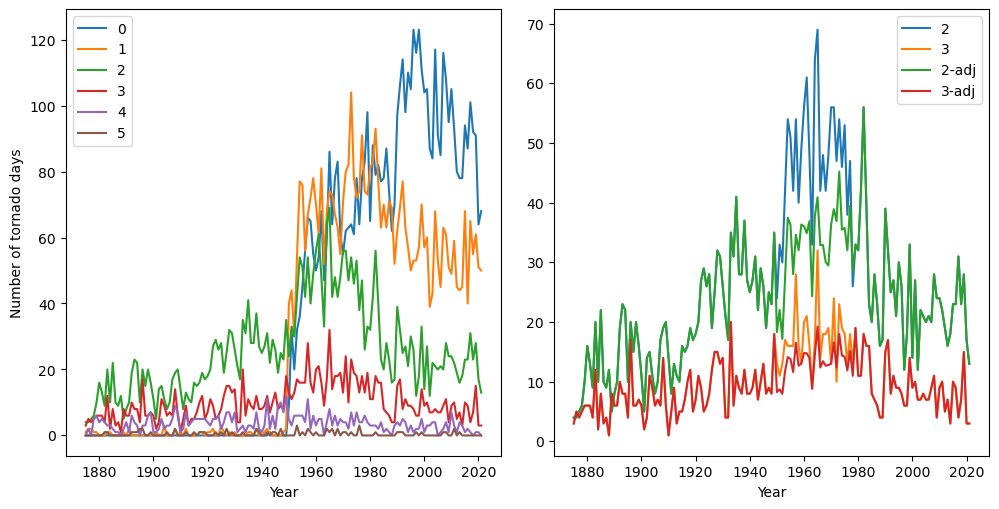

In [7]:
import matplotlib.pyplot as plt
# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

yearly_tor_day_df[[0,1,2,3,4,5]].plot(ax=axes[0])
yearly_tor_day_df[[2,3,'2-adj', '3-adj']].plot(ax=axes[1])
plt.tight_layout()

axes[0].set_ylabel('Number of tornado days')
axes[0].set_xlabel('Year')
axes[1].set_xlabel('Year')

Text(0.5, 25.722222222222214, 'Year')

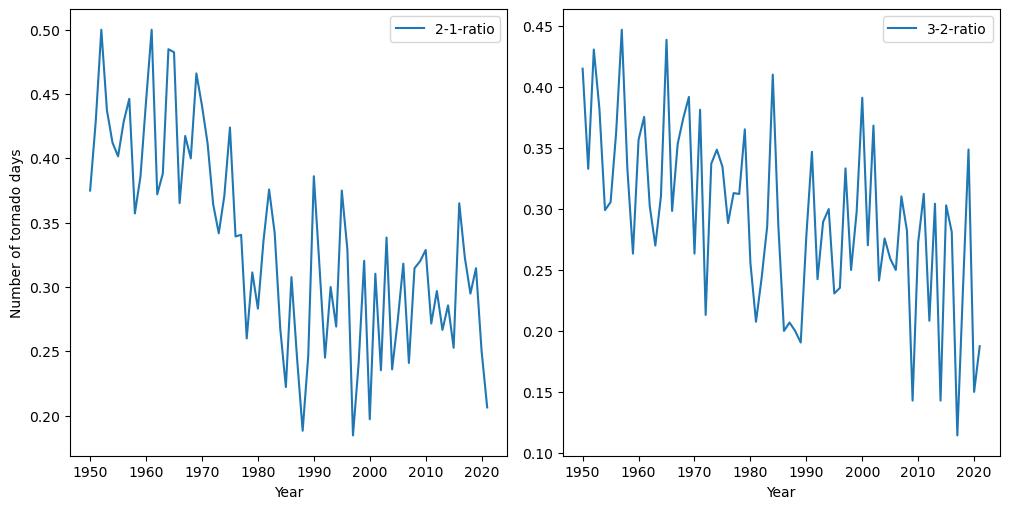

In [8]:
# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

yearly_tor_day_df[yearly_tor_day_df.index>=1950][['2-1-ratio']].plot(ax=axes[0])
yearly_tor_day_df[yearly_tor_day_df.index>=1950][['3-2-ratio']].plot(ax=axes[1])
plt.tight_layout()

axes[0].set_ylabel('Number of tornado days')
axes[0].set_xlabel('Year')
axes[1].set_xlabel('Year')

Text(0, 0.5, 'SOI')

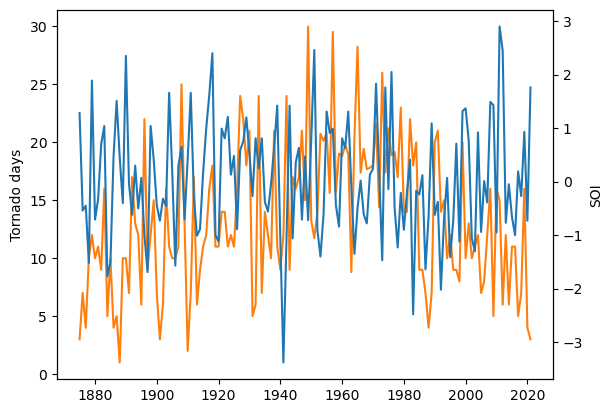

In [9]:
# Data exploration
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax1.plot(yearly_tor_day_df['intense-adj'], 'tab:orange')
ax1.set_ylabel('Tornado days')
ax2 = ax1.twinx()
ax2.plot(full_df['soi.long'].to_frame(), 'tab:blue')
ax2.set_ylabel('SOI')

In [10]:
'''
Old modeling attempts for raw tornado counts rather than tornado days

from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
# from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
# from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
import matplotlib.pyplot as plt

X = full_df
print(X)
y = tor_series
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

regr = HistGradientBoostingRegressor(
#     max_iter = 900,
#     solver = 'lbfgs',
#     alpha = 0.00005
#     n_estimators=250,
#     max_depth=3,
#     max_features=0.25,
#     min_samples_leaf = 8,
#     min_samples_split=7,
#     max_leaf_nodes=5,
)
regr.fit(X_train, y_train)
y_pred = pd.Series(data=regr.predict(X_test), index=X_test.index)
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))
plt.plot(y_test.values, c='tab:blue')
plt.plot(y_pred.values, c='tab:orange')
# plt.plot(y_train.values, c='tab:blue')
# plt.plot(pd.Series(data=regr.predict(X_train), index=X_train.index).values, c='tab:green')
'''

"\nOld modeling attempts for raw tornado counts rather than tornado days\n\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import ElasticNetCV\n# from sklearn.neural_network import MLPRegressor\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.ensemble import HistGradientBoostingRegressor\n# from sklearn.ensemble import RandomForestClassifier\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.svm import SVR\nimport matplotlib.pyplot as plt\n\nX = full_df\nprint(X)\ny = tor_series\nprint(y)\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)\n\nregr = HistGradientBoostingRegressor(\n#     max_iter = 900,\n#     solver = 'lbfgs',\n#     alpha = 0.00005\n#     n_estimators=250,\n#     max_depth=3,\n#     max_features=0.25,\n#     min_samples_leaf = 8,\n#     min_samples_split=7,\n#     max_leaf_nodes=5,\n)\nregr.fit(X_train, y_train)\ny_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.11901724007853443
0.04014749060844691


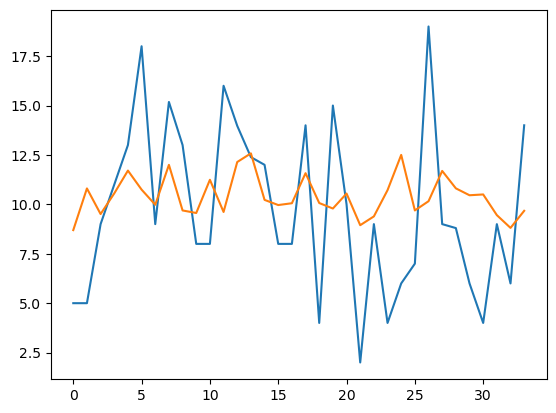

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
# from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

# This was for using subsets of indices
# X = full_df[['soi.long', 'tpi.long', 'nao.long', 'dmi.had.long', 'pna.20crv2c.long',
#              'sam.20crv2c.long', 'tpi.timeseries.ersstv5.filt']].loc[1875:2011]
# Select 1901-2011 since that's where all indices had data
X = full_df.loc[1901:2011]
# print(X)
y = yearly_tor_day_df['3-adj'].loc[1901:2011]
# print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# Used for Randomizedsearch
distributions = {
    'l1_ratio': uniform(loc=0.1, scale=0.8),
    'n_alphas': range(80,120),
    'cv': range(3,8),
}

regr = ElasticNetCV(
    n_alphas = 100,
    l1_ratio = 0.2,
    cv = 8,
    # Old code below - for other regressors tested
#     normalize=False,
#     max_iter = 900,
#     solver = 'lbfgs',
#     alpha = 0.00005
#     n_estimators=250,
#     max_depth=3,
#     max_features=0.25,
#     min_samples_leaf = 8,
#     min_samples_split=7,
#     max_leaf_nodes=5,
)

# Create pipeline with scaling and regressor/randomized search
pipe = make_pipeline(StandardScaler(),
                    RandomizedSearchCV(regr, distributions, random_state=1,
                                       verbose=1, n_iter=20),
#                     regr
                    )

# Perform fit and prediction
pipe.fit(X_train, y_train)
y_pred = pd.Series(data=pipe.predict(X_test), index=X_test.index)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))
# Plot test values and predictions
plt.plot(y_test.values, c='tab:blue')
plt.plot(y_pred.values, c='tab:orange')

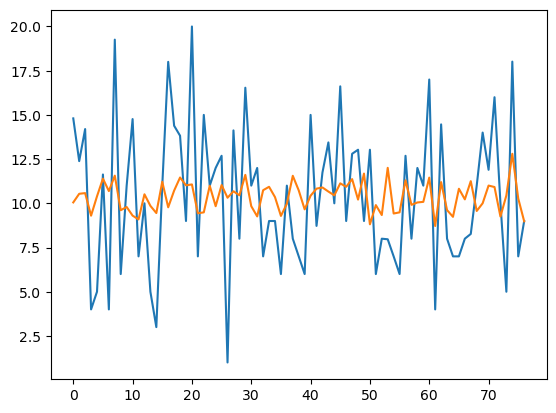

In [12]:
# Plotting training fit
import matplotlib.pyplot as plt
# plt.plot(y_test.sort_index())
# plt.plot(y_pred.sort_index())
# plt.plot(y_test.values, c='tab:blue')
# plt.plot(y_pred.values, c='tab:orange')
plt.plot(y_train.values, c='tab:blue')
plt.plot(pd.Series(data=pipe.predict(X_train), index=X_train.index).values, c='tab:orange')